In [7]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
def smoothing(arr, radius=10):
    y = []
    for i in range(len(arr)):
        y.append(np.mean(arr[i:radius+i]))
    return np.array(y)
    
# Import files and Generate plot data
plotdata_1 = pd.read_csv('data/PPO-LunarLander-rewards-train.csv', index_col=0)
plotdata_2 = pd.read_csv('data/PPO-LunarLander-actor_loss.csv', index_col=0)
plotdata_3 = pd.read_csv('data/PPO-LunarLander-critic_loss.csv', index_col=0)
plotdata_4 = pd.read_csv('data/PPO-LunarLander-total_loss.csv', index_col=0)

# Basic plotdata
n_episodes, n_trials = plotdata_1.shape
train_x = [i+1 for i in range(n_episodes)]

# Mean and variance
mean_vals_1 = plotdata_1.mean(axis=1)
std_vals_1 = plotdata_1.std(axis=1)

mean_vals_2 = plotdata_2.mean(axis=1)
std_vals_2 = plotdata_2.std(axis=1)

mean_vals_3 = plotdata_3.mean(axis=1)
std_vals_3 = plotdata_3.std(axis=1)

mean_vals_4 = plotdata_4.mean(axis=1)
std_vals_4 = plotdata_4.std(axis=1)

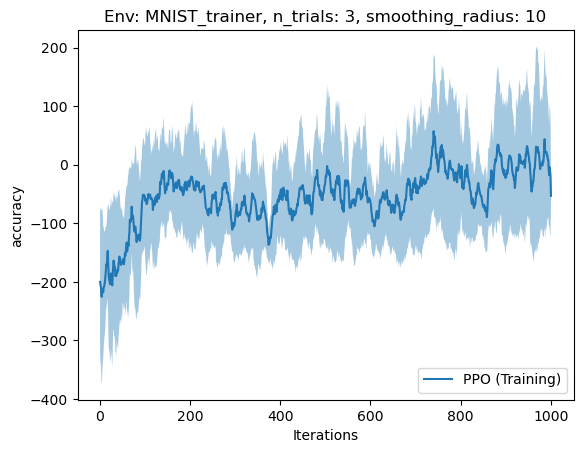

In [9]:
radius = 10
mean_vals = smoothing(mean_vals_1, radius)
std_vals = smoothing(std_vals_1, radius)

plt.figure()

plt.title("Env: MNIST_trainer, n_trials: {}, smoothing_radius: {}".format(n_trials, radius))
plt.xlabel("Iterations")
plt.ylabel("accuracy")

H = 1000
plt.plot(train_x[:H], mean_vals[:H], label='PPO (Training)')
plt.fill_between(train_x[:H], mean_vals[:H]-std_vals[:H], mean_vals[:H]+std_vals[:H], alpha=0.4)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander-score.png')
plt.show()

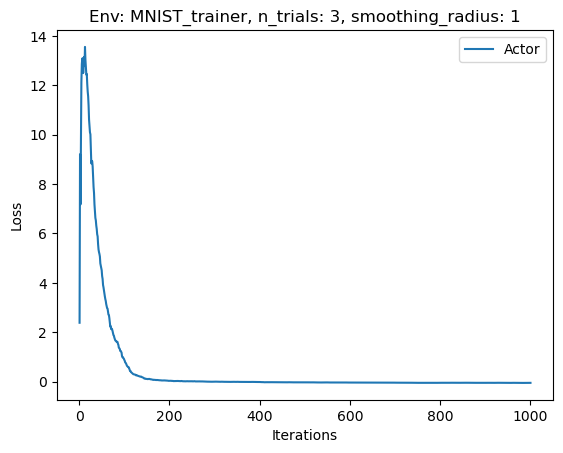

In [10]:
radius = 1
mean_vals = smoothing(mean_vals_2, radius)
std_vals = smoothing(std_vals_2, radius)

plt.figure()

plt.title("Env: MNIST_trainer, n_trials: {}, smoothing_radius: {}".format(n_trials, radius))
plt.xlabel("Iterations")
plt.ylabel("Loss")

H = 1000
plt.plot(train_x[:H], mean_vals[:H], label='Actor')
# plt.fill_between(train_x[:H], mean_vals[:H]-std_vals[:H], mean_vals[:H]+std_vals[:H], alpha=0.4)

plt.legend(loc='upper right')

plt.savefig('plots/LunarLander-actor_loss.png')
plt.show()

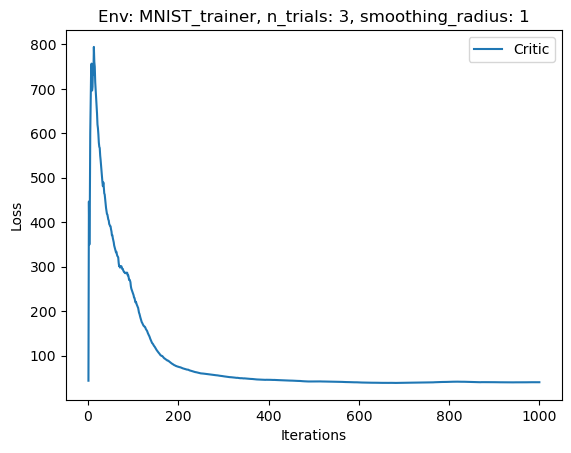

In [11]:
radius = 1
mean_vals = smoothing(mean_vals_3, radius)
std_vals = smoothing(std_vals_3, radius)

plt.figure()

plt.title("Env: MNIST_trainer, n_trials: {}, smoothing_radius: {}".format(n_trials, radius))
plt.xlabel("Iterations")
plt.ylabel("Loss")

H = 1000
plt.plot(train_x[:H], mean_vals[:H], label='Critic')
# plt.fill_between(train_x[:H], mean_vals[:H]-std_vals[:H], mean_vals[:H]+std_vals[:H], alpha=0.4)

plt.legend(loc='upper right')

plt.savefig('plots/LunarLander-critic_loss.png')
plt.show()

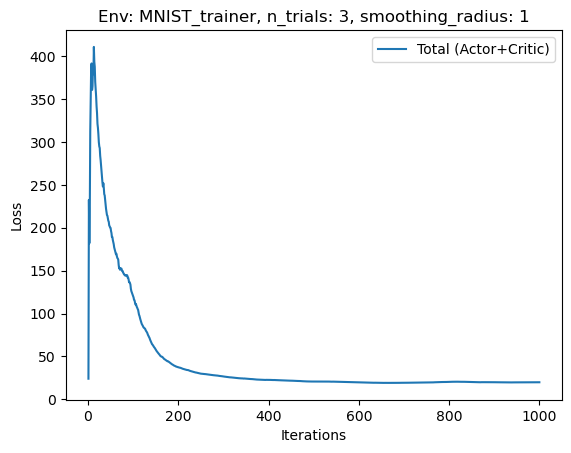

In [12]:
radius = 1
mean_vals = smoothing(mean_vals_4, radius)
std_vals = smoothing(std_vals_4, radius)

plt.figure()

plt.title("Env: MNIST_trainer, n_trials: {}, smoothing_radius: {}".format(n_trials, radius))
plt.xlabel("Iterations")
plt.ylabel("Loss")

H = 1000
plt.plot(train_x[:H], mean_vals[:H], label='Total (Actor+Critic)')
# plt.fill_between(train_x[:H], mean_vals[:H]-std_vals[:H], mean_vals[:H]+std_vals[:H], alpha=0.4)

plt.legend(loc='upper right')

plt.savefig('plots/LunarLander-total_loss.png')
plt.show()